# 05 - Taming Text

## Deadline
Thursday December 15, 2016 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution
you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code

## Background
In this homework you will explore a relatively large corpus of emails released in public during the
[Hillary Clinton email controversy](https://en.wikipedia.org/wiki/Hillary_Clinton_email_controversy).
You can find the corpus in the `hillary-clinton-emails` directory of this repository, while more detailed information 
about the [schema is available here](https://www.kaggle.com/kaggle/hillary-clinton-emails).

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.


# 0. Prelude

In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Coco231/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 1. Word cloud
Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

In [5]:
filename='hillary-clinton-emails/Emails.csv'
df = pd.read_csv(filename)
df.sample(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
6284,6285,C05771821,SCHEDULE,H,"Woodard, Eric W",65.0,2010-11-27T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0110/DOC_0C0...,F-2014-20439,...,NaN,"Woodard, Eric W <WoodardEW@state.gov>",Huma Abedin,"Saturday, November 27, 2010 6:29 PM",F-2014-20439,C05771821,08/31/2015,RELEASE IN PART,"Will do! Thnx, E\n-----",UNCLASSIFIED U.S. Department of State Case No....
2094,2095,C05762755,FRAME,H,"Mills, Cheryl D",32.0,2009-05-29T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/23_24_25_26/DO...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05762755,06/30/2015,RELEASE IN PART,"Mills, Cheryl D <MillsCD@state.gov>\nFriday, M...",UNCLASSIFIED U.S. Department of State Case No....
7021,7022,C05773820,H: BREAKTHROUGH IN NI TALKS! SID,sbwhoeop,H,80.0,2010-01-30T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0118/DOC_0C0...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05773820,08/31/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nSaturday, Janua 3...",UNCLASSIFIED U.S. Department of State Case No....
6767,6768,C05773068,(REUTERS) SAUDI KING TOLD TO REST OVER SLIPPED...,H,"Abedin, Huma",81.0,2010-11-12T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0107/DOC_0C0...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",SES-O_Shift-11; SES-0_05; SES-O_Shift-111,"Friday, November 12, 2010 9:51 PM",F-2014-20439,C05773068,08/31/2015,RELEASE IN PART,Aiming to send monday for tues delivery.,UNCLASSIFIED U.S. Department of State Case No....
4274,4275,C05767761,DEFCON2. SID,H,sbwhoeop,194.0,2010-01-09T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0051-0056/DO...,F-2014-20439,...,NaN,sbwhoeop,NaN,"Saturday, January 9, 2010 11:22 PM",F-2014-20439,C05767761,08/31/2015,RELEASE IN PART,http://www.publicpolicypolling.com/pdf/PPP_Rel...,UNCLASSIFIED U.S. Department of State Case No....
6431,6432,C05772139,ISABELLE CONFIRMED FOR 730,H,"Abedin, Huma",81.0,2010-09-08T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0096/DOC_0C0...,F-2014-20439,...,H,"Abedin, Huma <AbedinH@state.gov>",NaN,"Wednesday, September 8, 2010 10:16 PM",F-2014-20439,C05772139,08/31/2015,RELEASE IN FULL,NaN,UNCLASSIFIED U.S. Department of State Case No....
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
6144,6145,C05771586,(NYT) PALESTINIANS SAY TALKS WITH ISRAEL SHOUL...,H,"Abedin, Huma",81.0,2010-10-02T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0101/DOC_0C0...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH©state.gov>",SES-O_OS,"Saturday, October 2, 2010 1:29 PM",F-2014-20439,C05771586,08/31/2015,RELEASE IN FULL,NaN,UNCLASSIFIED U.S. Department of State Case No....
1510,1511,C05761291,TESTIMONY,H,jake.sullivan,87.0,2009-04-21T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/17_18_19/DOC_0...,F-2014-20439,...,NaN,jake.sullivan,'HAbedin,"Tuesday, April 21, 2009 7:43 AM",F-2014-20439,C05761291,06/30/2015,RELEASE IN PART,We'll have this for you.\nB6,UNCLASSIFIED U.S. Department of State Case No....
513,514,C05758795,DOES THIS MEAN YOUR CAREER AS A MAJOR LEAGUE P...,jpodesta,H,80.0,2009-06-25T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/2_3_4/DOC_0C05...,F-2014-20439,...,'jpodesta,H <hrod17@clinto

In [6]:
df2= df.copy()
def decode_str(row, axis=None):
    return str(row['ExtractedBodyText']).decode('utf-8')
    #return text.encode('utf-8')
#df2 = df2.apply(encode_str, axis = 1)
#df2.sample(10)['ExtractedBodyText'].str.encode('utf-8')


df2['ExtractedBodyText'] = df2.apply(decode_str, axis = 1)

df2.sample(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
1549,1550,C05761351,NaN,H,"Mills, Cheryl D",32.0,2009-04-25T04:00:00+00:00,2015-07-31T04:00:00+00:00,DOCUMENTS/HRCEmail_JulyWeb/Web_18-20M/DOC_0C05...,F-2014-20439,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Lew, Jacob J","Saturday, April 25, 2009 8:45 AM",F-2014-20439,C05761351,07/31/2015,RELEASE IN PART,Fyi,B6\nB5\nWhat role are you thinking about for h...
5243,5244,C05769886,S-SAUDABAYEV CALL,H,"Sullivan, Jacob J",87.0,2010-06-12T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0083/DOC_0C0...,F-2014-020439,...,NaN,"Sullivan, Jacob J <SullivanJJ@state.gov>","Abedin, Huma","Saturday, June 12, 2010 9:50 PM",F-2014-20439,C05769886,08/31/2015,RELEASE IN PART,Fyi. I think this call makes sense.,UNCLASSIFIED U.S. Department of State Case No....
174,175,C05739766,LIBYA,H,PIR,170.0,2012-09-22T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739766...,F-2015-04841,...,NaN,PIR,COM; Jake Sullivan,"Saturday, September 22, 2012 7:45 AM",F-2015-04841,C05739766,05/13/2015,RELEASE IN PART,"Associated Press\nPublished September 21, 2012...",UNCLASSIFIED\nU.S. Department of State\nCase N...
148,149,C05739734,"H: NEW INTEL, LIBYAN PM'S PLANS. SID",H,"Blumenthal, Sidney",194.0,2012-10-16T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH3/DOC_0C05739734...,F-2015-04841,...,NaN,Sidney Blumenthal B6,NaN,NaN,F-2015-04841,C05739734,05/13/2015,RELEASE IN PART,"October 16, 2012\nFor: Hillary",UNCLASSIFIED\nU.S. Department of State\nCase N...
2090,2091,C05762749,RE:,H,"Abedin, Huma",81.0,2009-05-28T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/23_24_25_26/DO...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",NaN,"Thursday, May 28, 2009 10:16 PM",F-2014-20439,C05762749,06/30/2015,RELEASE IN FULL,Have not heard from carl. Left him 2 messages ...,UNCLASSIFIED U.S. Department of State Case No....
727,728,C05759581,CALL LIST,JilotyLC@state.gov,H,80.0,2009-09-08T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/6_7_8/DOC_0C05...,F-2014-20439,...,'JilotyLC@state.gov',H <hrod17@clintonemail.com >,NaN,"Tuesday, September 8, 2009 8:24 AM",F-2014-20439,C05759581,06/30/2015,RELEASE IN FULL,Pis add:\nJackie Newmyer\nAnd can you get an o...,UNCLASSIFIED U.S. Department of State Case No....
865,866,C05759857,SEN. LEVIN,sullivanjj@state.gov,H,80.0,2009-09-30T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/10_11_15_16/DO...,F-2014-20439,...,'sullivanjj@state.gov',H <hrod17@clintonemail.com >,NaN,"Wednesday, September 30, 2009 7:52 AM",F-2014-20439,C05759857,06/30/2015,RELEASE IN FULL,Pis find out whether he supported the surge in...,UNCLASSIFIED U.S. Department of State Case No....
1654,1655,C05761548,HOLBROOKE,H,"Abedin, Huma",81.0,2009-05-09T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/20_21_22/DOC_0...,F-2014-20439,...,H,"Abedin, Huma <AbedinH@state.gov>",NaN,"Saturday, May 09, 2009 12:35 PM",F-2014-20439,C05761548,06/30/2015,RELEASE IN PART,Oscar has it. Should be printing now.,UNCLASSIFIED U.S. Department of State Case No....
248,249,C05739853,THANK YOU SO MUCH,NidesTR@state.gov,H,80.0,2012-12-20T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH3/DOC_0C05739853...,F-2015-04841,...,'NidesTR@state.gov',H ‹hrod17@clintonemailcom>,"Mills, Cheryl D","Thursday, December 20, 2012 07:47 AM Eastern S...",F-2015-04841,C05739853,05/13/2015,RELEASE IN FULL,"Well, what doesn't kill you, makes you stronge...",UNCLASSIFIED\nU.S. Department of State\nCase N...
6976,6977,C05773686,PLANE READING: OLD BOYS NETWORK V ASHTON,slaughtera@state.gov,H,80.0,2010-01

In [7]:
raw = df2['ExtractedBodyText'].dropna().reset_index()
raw_corpus = ' '.join(raw['ExtractedBodyText'])

In [144]:
from wordcloud import WordCloud

def plot_wordcloud(cloud):
    plt.figure()
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

### 1.1 No pre-processing

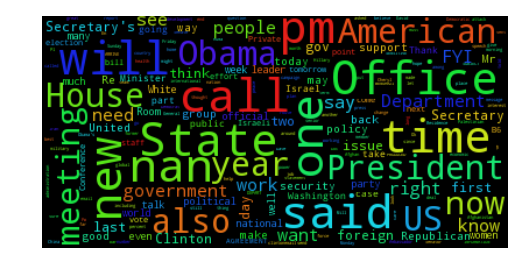

In [8]:
wordcloud = WordCloud(max_font_size=40).generate(raw_corpus)

plot_wordcloud(wordcloud)

### 1.2 Standard stemming

For this part we will use `ntlk`'s built-in Snowball stemmer and tokenizer. 

In [25]:
from nltk.stem.snowball import SnowballStemmer

stopwords = nltk.corpus.stopwords.words('english')
stopwords += [
    'fyi', 'will', 'call', 'said', 'time', 'want', 'know', 'pm', 'am', 
    'also', 'call', 'know', 'would', 'get', 'time', 'work', 'like', 'today',
    'see', 'morning', 'also', 'back', 'tomorrow', 'meeting', 'think', 'good',
    'want', 'could', 'working', 'well'
]

stemmer = SnowballStemmer('english', ignore_stopwords=True)

In [9]:
import re

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('^[a-zA-Z]+$', token) and token not in stopwords:
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [10]:

tokenized = tokenize_and_stem(raw_corpus)

In [228]:
flat_tok = ' '.join(tokenized)

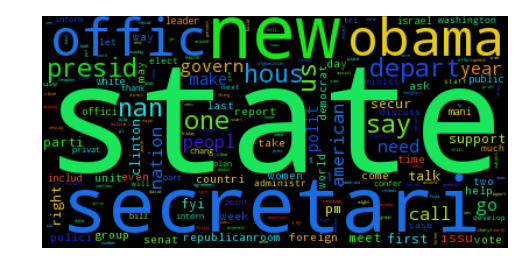

In [229]:
wordcloud_processed = WordCloud().generate(flat_tok)

plot_wordcloud(wordcloud_processed)

# 2. Sentiment analysis

Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

In [191]:
import pycountry
#import jellyfish
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process
import re
from nltk.sentiment import vader

In [217]:
py_countries = pycountry.countries

def regexify(text):
    return text.replace(' ', '\s+')

country_names = [
    regexify(c.name.lower())
    for c in py_countries
]

official_names = [
    regexify(c.official_name.lower())
    for c in py_countries
    if 'official_name' in c._fields
]

codes = (
    [c.alpha_2.lower() for c in py_countries] +
    [c.alpha_3.lower() for c in py_countries]
)

# codes = []

all_needles = official_names + country_names + codes

reg = r'(\b(?:' + r')\b|\b(?:'.join(all_needles) + r')\b)'

def get_non_empty(l):
    return list(set([i for x in l for i in list(x) if i != '']))
    
def extract_countries(text, axis=None):
    m = re.findall(reg, text)
    results = get_non_empty(m)
    return [py_countries.lookup(res) for res in results]

def analyze_sentiment_vader(text):
    analyzer = vader.SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

def analyze_sentiment_liuhu(sentence):
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1

    v = pos_words - neg_words
    v_scaled = v/len(tokenized_sent)
    
    return {
        'pos': pos_words,
        'neg': neg_words,
        'compound': v_scaled
    }
    

def get_entry_text(entry):
    subject_body = str(entry['ExtractedSubject']) + '\n\n' + str(entry['ExtractedBodyText'])
    return subject_body.replace('\n', ' ').lower()

def process_mails(df, analyze_sentiment):
    res = {}
    by_country = {}

    for idx, entry in df.iterrows():
        text = get_entry_text(entry)
        countries = extract_countries(text)
        score = analyze_sentiment(text)
        
        codes = [c.name for c in countries]
        
        for country in countries:
            code = country.name
            if code not in by_country:
                by_country[code] = {
                    'sentiments': [],
                    #'mails': [],
                    'count': 0
                }
            by_country[code]['sentiments'].append(score['compound'])
            #by_country[code]['mails'].append(idx)
            by_country[code]['count'] += 1

        res[idx] = {
            'countries': countries,
            'sentiment': score['compound']
        }
    
    return (res, by_country)

In [218]:
with_countries = df.copy()[0:100]

(result, by_country) = process_mails(with_countries, analyze_sentiment_vader)

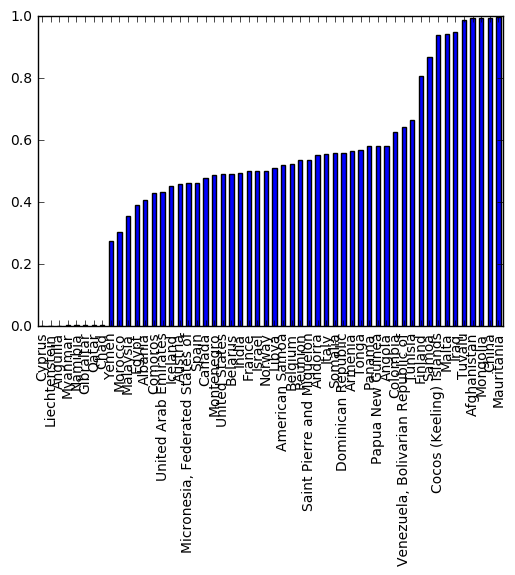

In [220]:
by_country2 = {}

for key in by_country:
    sents = by_country[key]['sentiments']
    count = by_country[key]['count']
    
    if count < 0:
        continue
    
    by_country2[key] = {
        'sentiment': ((sum(sents) / float(len(sents))) + 1) / 2,
        'count': count
    }

countries_df = pd.DataFrame.from_dict(by_country2, orient='index')
countries_df = countries_df.sort_values(by='sentiment', axis=0)

countries_df['sentiment'].plot(kind='bar')

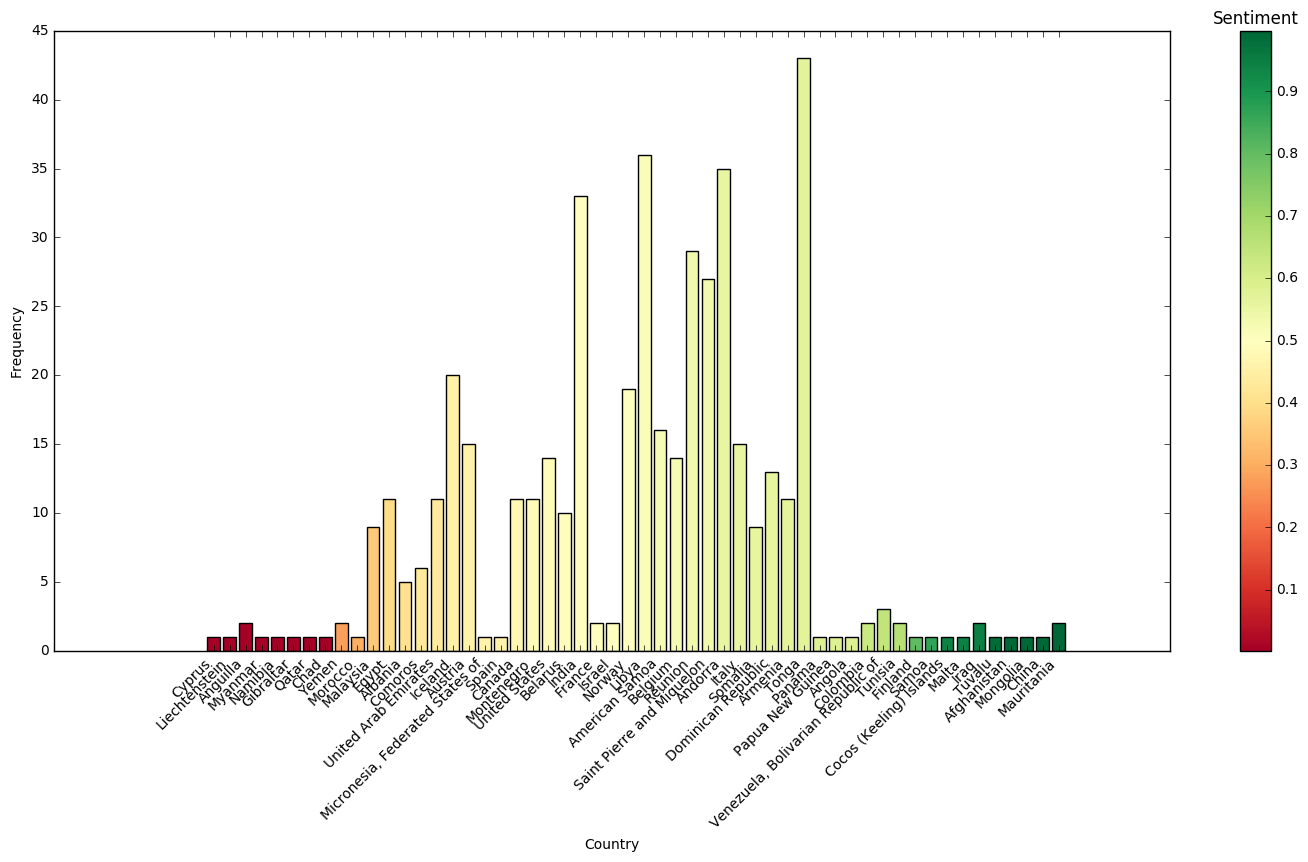

In [221]:
# Credits to Stack Overflow :
# http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
from matplotlib import cm

plt.figure(figsize=(18, 8), dpi=80)

# Set up colors : red to green
y = np.array(countries_df['sentiment'])
colors = cm.RdYlGn((y / float(max(y))))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(countries_df.shape[0]), countries_df['count'], align='center', tick_label=countries_df.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

# 3. Topic modelling 
### 3.1 Sci-kit learn version

Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
from sklearn.externals import joblib

In [15]:
def fit_tfidf(emails):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                       min_df=0.2, stop_words=text.ENGLISH_STOP_WORDS,
                                       use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

    tfidf_matrix = tfidf_vectorizer.fit_transform(emails)
    terms = tfidf_vectorizer.get_feature_names()
    return (terms, tfidf_matrix, tfidf_vectorizer)

In [16]:
def fit_tf(articles):
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                    max_features=1000,
                                    stop_words=text.ENGLISH_STOP_WORDS)
    tf_matrix = tf_vectorizer.fit_transform(articles)
    terms = tf_vectorizer.get_feature_names()
    return (terms, tf_matrix, tf_vectorizer)

In [17]:
def run_lda(tf_matrix, tf_vectorizer):
    lda = LatentDirichletAllocation(n_topics=n_topics,
                                    max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)

    lda.fit(tf_matrix)
    return lda

In [18]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join(['\n + ' + str(topic[i]) + '*' + str(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [19]:
print(type(raw_corpus))

<type 'unicode'>


In [20]:
tfidf_terms, tfidf_matrix, tfidf_vectorizer = fit_tf(raw['ExtractedBodyText'])

In [21]:
joblib.dump(tfidf_matrix, 'tfidf_matrix.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(tfidf_terms, 'tfidf_terms.pkl')

['tfidf_terms.pkl']

In [238]:
n_topics = 10; n_top_words = 20

In [239]:
lda = run_lda(tfidf_matrix, tfidf_vectorizer)

In [240]:
joblib.dump(lda, 'sklearn_lda_model.pkl')

['sklearn_lda_model.pkl']

In [128]:
print_top_words(lda, tfidf_terms, n_top_words)

Topic #0:

 + 256.296004302*pls 
 + 238.633932215*print 
 + 178.356853464*thank 
 + 153.938180524*koch 
 + 127.77623719*pis 
 + 86.6047152067*add 
 + 70.4246712501*fax 
 + 69.7582445507*secure 
 + 68.5047329801*speak 
 + 39.8028888905*coming 
 + 39.4749971608*sure 
 + 37.5250937124*sent 
 + 28.1236385637*soon 
 + 19.2837182355*numbers 
 + 15.3064306839*hear 
 + 10.8432831735*version 
 + 8.60784517733*discuss 
 + 8.03640413908*hours 
 + 8.02951418101*hillary 
 + 6.3255957563*meet
Topic #1:

 + 656.982975215*know 
 + 558.153659417*just 
 + 480.041426977*think 
 + 435.22715219*want 
 + 425.617145753*work 
 + 413.000579285*tomorrow 
 + 400.337322627*good 
 + 394.352757896*like 
 + 385.753198842*let 
 + 377.762436724*time 
 + 371.788236429*today 
 + 339.525340384*talk 
 + 311.485375768*ll 
 + 303.332387665*ok 
 + 291.038663525*going 
 + 286.980379793*don 
 + 256.240536066*make 
 + 227.562769691*need 
 + 227.513572332*morning 
 + 226.713983979*ve
Topic #2:

 + 682.589549869*fyi 
 + 318.40856

### 3.2 gensim version

In [12]:
from gensim import corpora, models

# This is kind of the same as the earlier tokenize_and_stem 
# but for some reason I had some issues with it (BoW wasn't accepting my tokens :()
# Source :
# https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html
#

for mail in raw['ExtractedBodyText']:
    tokens = tokenizer.tokenize(mail)
    stopped_tokens = [tok for tok in tokens if not tok in text.ENGLISH_STOP_WORDS] # BAD
    stemmed_tokens = [stemmer.stem(tok) for tok in stopped_tokens]
    texts.append(stemmed_tokens)

# Create dictionary
dictionary = corpora.Dictionary(texts)
# Bag of Words
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

AttributeError: 'module' object has no attribute 'tokenizer'

In [74]:
def clean_str(word):
    return re.sub("[^a-zA-Z]","", word.lower())
raw_corpus = list(raw['ExtractedBodyText'])

texts = [[clean_str(word) for word in document.lower().split() if word not in stopwords and  len(clean_str(word)) > 1]
         for document in raw_corpus]
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
dictionary = corpora.Dictionary(processed_corpus)

In [75]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
dictionary = corpora.Dictionary(processed_corpus)


In [76]:
lda_model = models.ldamodel.LdaModel(bow_corpus, id2word=dictionary, num_topics=15, passes = 3)


In [114]:
def sort_words = 

topics_list = [i for i in lda_model.show_topics(15)]
line.split('+') for line in topic_list 

[(0,
  u'0.023*"israel" + 0.017*"israeli" + 0.008*"palestinian" + 0.008*"settlements" + 0.007*"jewish" + 0.007*"palestinians" + 0.007*"peace" + 0.007*"netanyahu" + 0.006*"jerusalem" + 0.006*"one"'),
 (1,
  u'0.009*"afghanistan" + 0.006*"us" + 0.006*"afghan" + 0.006*"women" + 0.006*"mcchrystal" + 0.006*"military" + 0.005*"war" + 0.005*"one" + 0.005*"government" + 0.005*"general"'),
 (2,
  u'0.006*"us" + 0.006*"agree" + 0.005*"food" + 0.005*"great" + 0.005*"thank" + 0.004*"need" + 0.004*"make" + 0.004*"development" + 0.004*"hope" + 0.004*"state"'),
 (3,
  u'0.022*"party" + 0.019*"boehner" + 0.013*"election" + 0.011*"rightwing" + 0.009*"labour" + 0.008*"vote" + 0.007*"for" + 0.007*"jones" + 0.006*"tea" + 0.006*"hillary"'),
 (4,
  u'0.009*"robinson" + 0.009*"kurt" + 0.009*"dup" + 0.008*"latrines" + 0.007*"night" + 0.006*"ingo" + 0.006*"strobe" + 0.006*"woodward" + 0.005*"confirm" + 0.005*"traffic"'),
 (5,
  u'0.059*"nan" + 0.011*"obama" + 0.008*"president" + 0.006*"washington" + 0.006*"hou

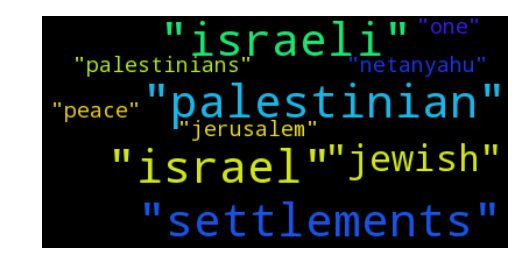

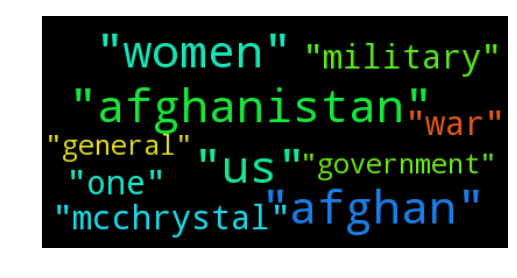

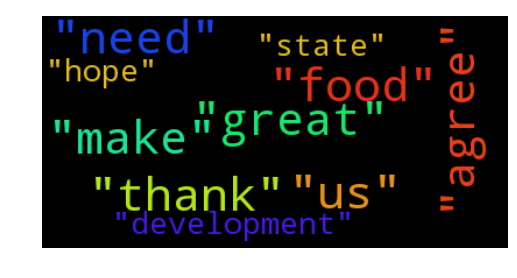

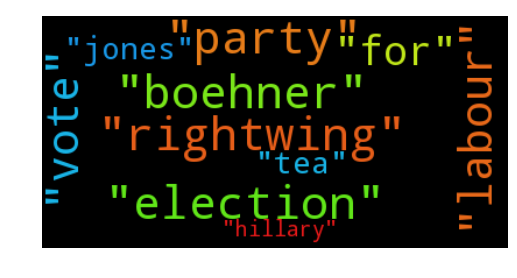

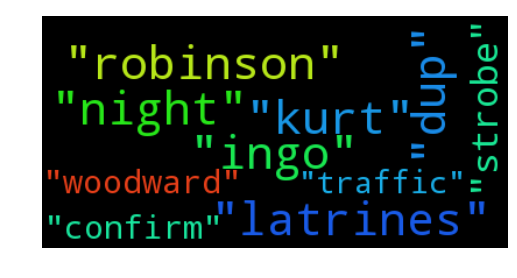

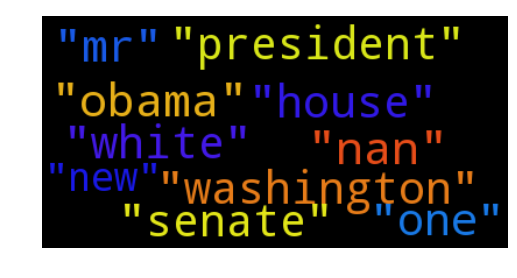

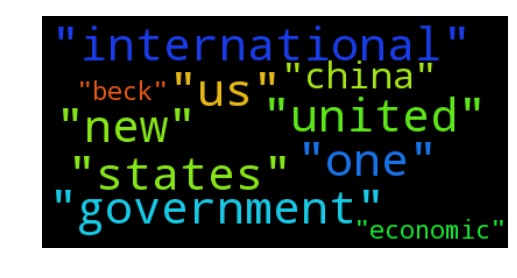

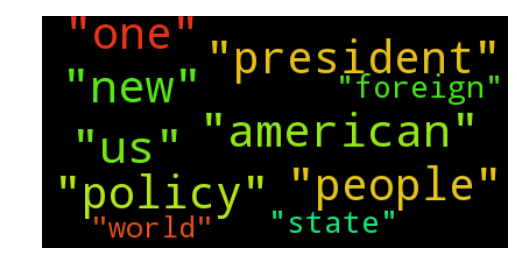

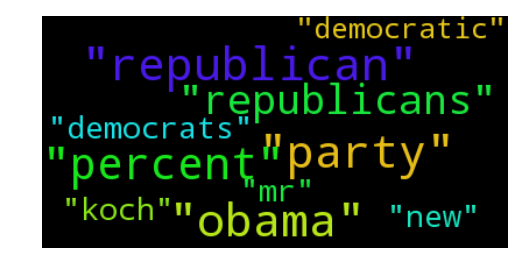

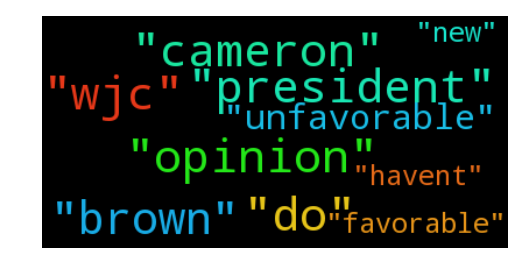

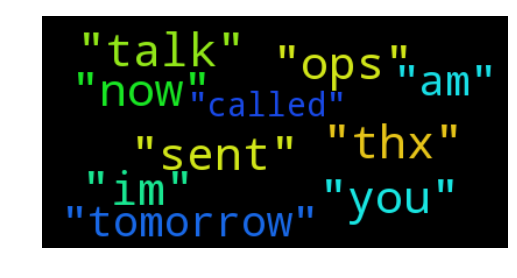

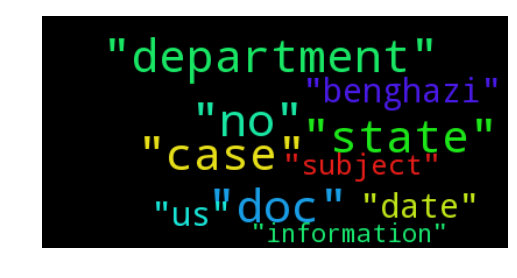

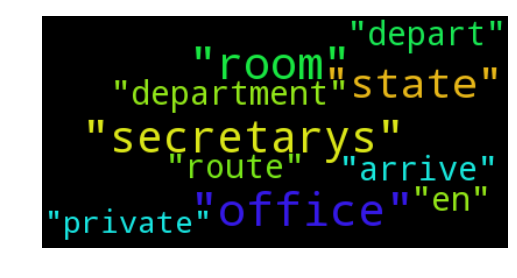

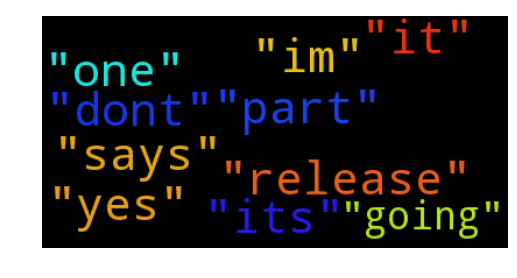

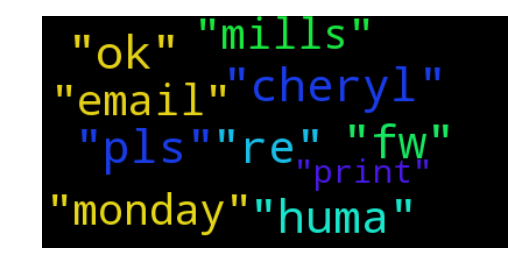

NameError: name 'final_topics' is not defined

In [161]:
import os
for line in topics_list:
    scores = [float(x.split("*")[0]) for x in line[1].split(" + ")]
    words = [x.split("*")[1] for x in line[1].split(" + ")]
    freqs = []
    for word, score in zip(words, scores):
        freqs.append((word, score))
      
    elements = WordCloud(max_font_size=40).fit_words(freqs)
    plot_wordcloud(elements)
    curr_topic += 1
final_topics.close()
#topics_list[1][1].split('+')[1].split('*')[0]
#topics_list

In [148]:
import os
import wordcloud


curr_topic = 0
for line in topics_list:
    scores = [float(x.split("*")) for x in line.split[0](" + ")]
    words = [x.split("*")[1] for x in line[0].split(" + ")]
    freqs = []
    for word, score in zip(words, scores):
        freqs.append((word, score))
    elements = wordcloud.fit_words(freqs)
    wordcloud.draw(elements, "gs_topic_%d.png" % (curr_topic),
                   width=120, height=120)
    curr_topic += 1
final_topics.close()

AttributeError: 'tuple' object has no attribute 'split'

In [155]:
print(ldamodel.print_topics(num_topics=20, num_words=10))

[(0, '0.019*"build" + 0.019*"offic" + 0.014*"senat" + 0.013*"number" + 0.011*"kennedi" + 0.009*"ill" + 0.008*"limit" + 0.007*"grid" + 0.007*"cell" + 0.007*"church"'), (1, '0.065*"pm" + 0.038*"s" + 0.036*"secretari" + 0.035*"offic" + 0.031*"30" + 0.028*"00" + 0.027*"depart" + 0.022*"8" + 0.022*"w" + 0.020*"10"'), (2, '0.056*"fyi" + 0.050*"no" + 0.043*"state" + 0.033*"to" + 0.030*"2015" + 0.021*"benghazi" + 0.020*"subject" + 0.020*"doc" + 0.019*"inform" + 0.018*"f"'), (3, '0.021*"i" + 0.016*"haiti" + 0.014*"work" + 0.013*"un" + 0.009*"women" + 0.008*"peopl" + 0.008*"haitian" + 0.008*"plan" + 0.007*"need" + 0.007*"issu"'), (4, '0.097*"i" + 0.014*"s" + 0.013*"work" + 0.013*"m" + 0.012*"know" + 0.011*"want" + 0.011*"we" + 0.010*"w" + 0.010*"just" + 0.010*"tomorrow"'), (5, '0.035*"ok" + 0.023*"pls" + 0.021*"print" + 0.020*"will" + 0.019*"i" + 0.018*"email" + 0.017*"can" + 0.017*"sent" + 0.016*"thx" + 0.016*"call"'), (6, '0.024*"senat" + 0.018*"koch" + 0.014*"said" + 0.012*"boehner" + 0.012*"

In [157]:
joblib.dump(ldamodel, 'gensim_lda_model.pkl')

['gensim_lda_model.pkl',
 'gensim_lda_model.pkl_01.npy',
 'gensim_lda_model.pkl_02.npy',
 'gensim_lda_model.pkl_03.npy',
 'gensim_lda_model.pkl_04.npy',
 'gensim_lda_model.pkl_05.npy',
 'gensim_lda_model.pkl_06.npy']

# 4. (bonus) Communication graph
*BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.